# chem123 exp9 analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:.4g}'.format)

In [3]:
# define constants, read in data
KIO3_MOLECULAR_WEIGHT = 214
ASCORBIC_ACID_MOLECULAR_WEIGHT = 176.1
raw_data = pd.read_csv('chem123-exp9-data.csv')
raw_data

,Sample,$KIO_3$ titrant Used (mL),$KIO_3$ volume (g)
0,Control (Rachel),18.7,0.0811
1,Control (Rachel),18.4,0.0811
2,20sec,17.12,0.0811
3,60sec,17.26,0.0811
4,60sec,17.46,0.0811
5,Control (Nathan),17.6,0.0903
6,Control (Nathan),17.14,0.0903
7,10sec,18.89,0.0903
8,50sec,16.53,0.0903
9,Control (Donny),24.53,0.0633


In [4]:
# rename control samples for easier sorting/aggregation.
raw_data['Sample'] = raw_data['Sample'].str.replace(
    r'(Control)[\s][\w()]+',
    '0_Control',
    regex=True
)
raw_data

,Sample,$KIO_3$ titrant Used (mL),$KIO_3$ volume (g)
0,0_Control,18.7,0.0811
1,0_Control,18.4,0.0811
2,20sec,17.12,0.0811
3,60sec,17.26,0.0811
4,60sec,17.46,0.0811
5,0_Control,17.6,0.0903
6,0_Control,17.14,0.0903
7,10sec,18.89,0.0903
8,50sec,16.53,0.0903
9,0_Control,24.53,0.0633


In [5]:
# Calculate mg of ascorbic acid.
raw_data['$KIO_3$ volume (mol)'] = (
    raw_data['$KIO_3$ volume (g)'] / KIO3_MOLECULAR_WEIGHT
)
raw_data['Moles of $KIO_3$ per mL of titrant'] = (
    raw_data['$KIO_3$ volume (mol)'] / 250
)
raw_data['Moles of $KIO_3$ used'] = (
    raw_data['Moles of $KIO_3$ per mL of titrant'] *
    raw_data['$KIO_3$ titrant Used (mL)']
)
raw_data['Moles of ascorbic acid'] = (
    raw_data['Moles of $KIO_3$ used'] * 3
)
raw_data['Amount of ascorbic acid (mg)'] = (
    raw_data['Moles of ascorbic acid'] *
    ASCORBIC_ACID_MOLECULAR_WEIGHT *
    1000
)
raw_data

,Sample,$KIO_3$ titrant Used (mL),$KIO_3$ volume (g),$KIO_3$ volume (mol),Moles of $KIO_3$ per mL of titrant,Moles of $KIO_3$ used,Moles of ascorbic acid,Amount of ascorbic acid (mg)
0,0_Control,18.7,0.0811,0.000379,1.516e-06,2.835e-05,8.504e-05,14.98
1,0_Control,18.4,0.0811,0.000379,1.516e-06,2.789e-05,8.368e-05,14.74
2,20sec,17.12,0.0811,0.000379,1.516e-06,2.595e-05,7.786e-05,13.71
3,60sec,17.26,0.0811,0.000379,1.516e-06,2.616e-05,7.849e-05,13.82
4,60sec,17.46,0.0811,0.000379,1.516e-06,2.647e-05,7.94e-05,13.98
5,0_Control,17.6,0.0903,0.000422,1.688e-06,2.971e-05,8.912e-05,15.69
6,0_Control,17.14,0.0903,0.000422,1.688e-06,2.893e-05,8.679e-05,15.28
7,10sec,18.89,0.0903,0.000422,1.688e-06,3.188e-05,9.565e-05,16.84
8,50sec,16.53,0.0903,0.000422,1.688e-06,2.79e-05,8.37e-05,14.74
9,0_Control,24.53,0.0633,0.0002958,1.183e-06,2.902e-05,8.707e-05,15.33


In [6]:
# sort data in order of samples
sorted_data = raw_data.sort_values(by=['Sample'])
sorted_data

,Sample,$KIO_3$ titrant Used (mL),$KIO_3$ volume (g),$KIO_3$ volume (mol),Moles of $KIO_3$ per mL of titrant,Moles of $KIO_3$ used,Moles of ascorbic acid,Amount of ascorbic acid (mg)
0,0_Control,18.7,0.0811,0.000379,1.516e-06,2.835e-05,8.504e-05,14.98
1,0_Control,18.4,0.0811,0.000379,1.516e-06,2.789e-05,8.368e-05,14.74
5,0_Control,17.6,0.0903,0.000422,1.688e-06,2.971e-05,8.912e-05,15.69
6,0_Control,17.14,0.0903,0.000422,1.688e-06,2.893e-05,8.679e-05,15.28
9,0_Control,24.53,0.0633,0.0002958,1.183e-06,2.902e-05,8.707e-05,15.33
10,0_Control,24.45,0.0633,0.0002958,1.183e-06,2.893e-05,8.679e-05,15.28
13,0_Control,13.16,0.1004,0.0004692,1.877e-06,2.47e-05,7.409e-05,13.05
7,10sec,18.89,0.0903,0.000422,1.688e-06,3.188e-05,9.565e-05,16.84
2,20sec,17.12,0.0811,0.000379,1.516e-06,2.595e-05,7.786e-05,13.71
11,30sec,24.12,0.0633,0.0002958,1.183e-06,2.854e-05,8.561e-05,15.08


In [7]:
# for titrations with multiple trials, average the results
cleaned_data = sorted_data \
                    .groupby('Sample') \
                    .mean() \
                    .reset_index() \
                    .filter([
                        'Sample',
                        'Amount of ascorbic acid (mg)'
                    ])
# rename control column for clarity, now that sorting is complete.
cleaned_data['Sample'] = cleaned_data['Sample'].str.replace(
    '0_Control',
    'Control',
    regex=True
)
cleaned_data

,Sample,Amount of ascorbic acid (mg)
0,Control,14.91
1,10sec,16.84
2,20sec,13.71
3,30sec,15.08
4,40sec,12.38
5,50sec,14.74
6,60sec,13.9
7,70sec,15
8,80sec,12.08


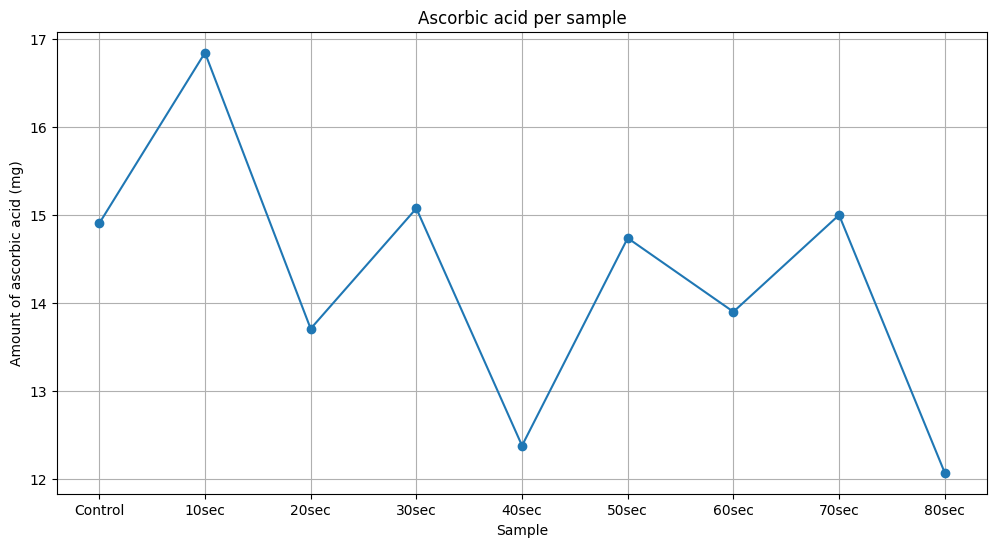

In [8]:
results_graph = plt.figure(figsize=[12,6])

plt.plot(
    cleaned_data['Sample'],
    cleaned_data['Amount of ascorbic acid (mg)'],
    marker='o'
)

plt.xlabel('Sample')
plt.ylabel('Amount of ascorbic acid (mg)')
plt.grid(visible=True)
plt.title('Ascorbic acid per sample')
plt.show()